<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Shopping_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn import metrics

DATA EXTRACTION

In [6]:
shop = pd.read_csv(f"E:\Projects\Machine Learning Projects\Raw Data\Regression\shopping_trends.csv")
shop.head(2), shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

(   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
 0            1   55   Male         Blouse  Clothing                     53   
 1            2   19   Male        Sweater  Clothing                     64   
 
    Location Size   Color  Season  Review Rating Subscription Status  \
 0  Kentucky    L    Gray  Winter           3.10                 Yes   
 1     Maine    L  Maroon  Winter           3.10                 Yes   
 
   Payment Method Shipping Type Discount Applied Promo Code Used  \
 0    Credit Card       Express              Yes             Yes   
 1  Bank Transfer       Express              Yes             Yes   
 
    Previous Purchases Preferred Payment Method Frequency of Purchases  
 0                  14                    Venmo            Fortnightly  
 1                   2                     Cash            Fortnightly  ,
 None)

DATA PREPROCESSING

---

In [7]:
shop_cop = shop.copy()

In [8]:
enc=LabelEncoder()
obj = shop_cop.select_dtypes(include='object').columns
for i in obj:
    shop_cop[i] = enc.fit_transform(shop_cop[i])
shop_cop.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.10,1,2,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.10,1,0,1,1,1,2,1,3


DATA ANALYSIS

---

In [11]:
sns.set()

In [9]:
def plot_style(data, x, y=None, hue=None, style='hist'):
    plt.figure(figsize=(15, 3))
    if style=='hist':
        sns.histplot(data[x], kde=True, kde_kws=dict(cut=3))
    elif style=='scatter':
        sns.scatterplot(data=data, x=x, y=y, hue=hue)
    elif style=='box':
        sns.boxplot(data=data, x=x, y=y, hue=hue)
    elif style=='count':
        sns.countplot(data=data, y=y, hue=hue)
    plt.show()

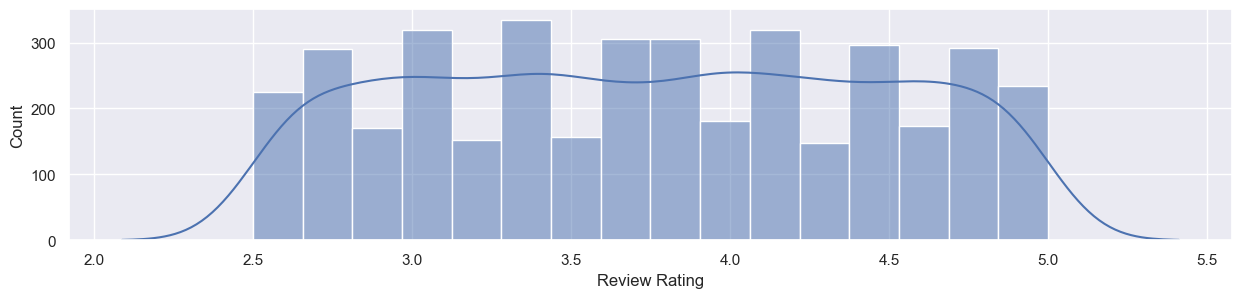

In [12]:
plot_style(shop, x='Review Rating', style='hist')

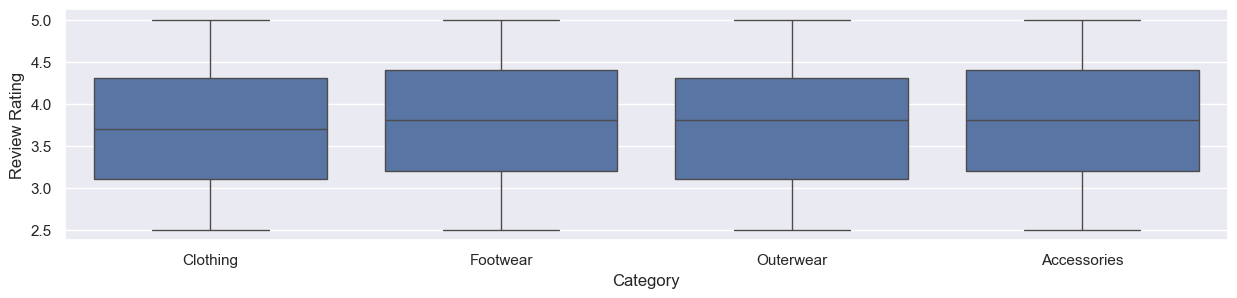

In [15]:
plot_style(shop, x='Category', y='Review Rating', style='box')

In [17]:
corr = shop_cop.corr()
print(corr['Subscription Status'].sort_values(ascending=False).round(3)*100)

Subscription Status        100.00
Promo Code Used             70.00
Discount Applied            70.00
Gender                      41.70
Previous Purchases           3.10
Color                        2.10
Shipping Type                1.70
Preferred Payment Method     1.60
Category                     1.10
Age                          0.60
Location                     0.50
Frequency of Purchases       0.40
Item Purchased               0.30
Season                      -0.50
Review Rating               -0.60
Purchase Amount (USD)       -0.70
Payment Method              -0.70
Size                        -1.50
Customer ID                -76.90
Name: Subscription Status, dtype: float64


MACHINE LEARNING MODEL BUILDING

---

In [31]:
X = shop_cop.drop(columns=['Purchase Amount (USD)', 'Payment Method', 'Size', 'Customer ID','Season', 'Review Rating'], axis=1)
y = shop_cop['Subscription Status']

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clas = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clas.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/32 [00:00<?, ?it/s]

100%|██████████| 32/32 [00:04<00:00,  7.87it/s]

[LightGBM] [Info] Number of positive: 831, number of negative: 2289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 3120, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266346 -> initscore=-1.013241
[LightGBM] [Info] Start training from score -1.013241
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [32]:
models.head()

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.05
BaggingClassifier,1.00,1.00,1.00,1.00,0.07
SVC,1.00,1.00,1.00,1.00,0.11
SGDClassifier,1.00,1.00,1.00,1.00,0.03
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.03


In [34]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

MODEL EVALUATION

---

In [36]:
acc_scr = metrics.accuracy_score(y_test, clf.predict(X_test))
print(f"Accuracy Score for test is {acc_scr*100:.2f}%")

Accuracy Score for test is 100.00%


K-MEANS CLUSTERING

In [37]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

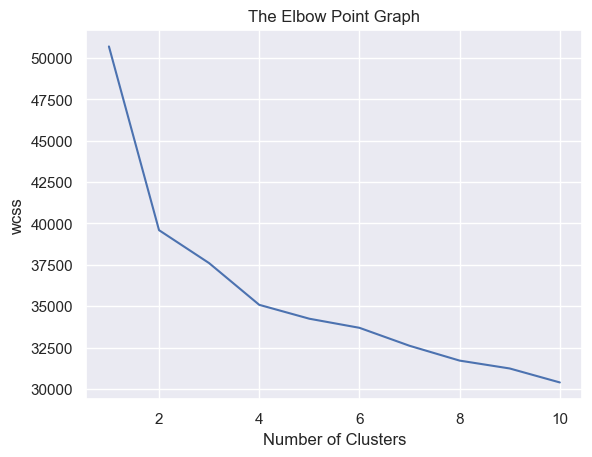

In [38]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [39]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

Y

array([2, 2, 2, ..., 3, 3, 3])